In [1]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
# My Tools
%matplotlib inline

In [2]:
# Reseting figure size params.
plt.rcParams['figure.figsize'] = [12, 7]

# Setting seaborn as default plotting lib.
sns.set()
sns.set_theme(palette='pastel')

In [3]:
df = pd.read_csv('encuesta_baches_fixed.csv')

In [4]:
def show_columns():
    for i in df.columns:
        print(i)

In [5]:
solo_paraguay = df.groupby('lugar_residencia').get_group('Paraguay')

In [6]:
conteos_lugares_paraguay = solo_paraguay['lugar_residencia_py'].value_counts()

# SE UTILIZARAN PARA EL ANALISIS TODOS LOS LUGARES CON MAS DE 2 RESPUESTAS A LA ENCUESTA.

In [7]:
lugares_optimos = conteos_lugares_paraguay[conteos_lugares_paraguay>2]

In [8]:
lugares_optimos.keys()

Index(['Central', 'Distrito Capital', 'Alto Paraná', 'Itapúa', 'Caaguazú',
       'Cordillera', 'Amambay'],
      dtype='object')

## lugar_residencia_py
    - En caso de residir en Paraguay, a los encuestados se les pidio que indicaran el departamento de residencia.

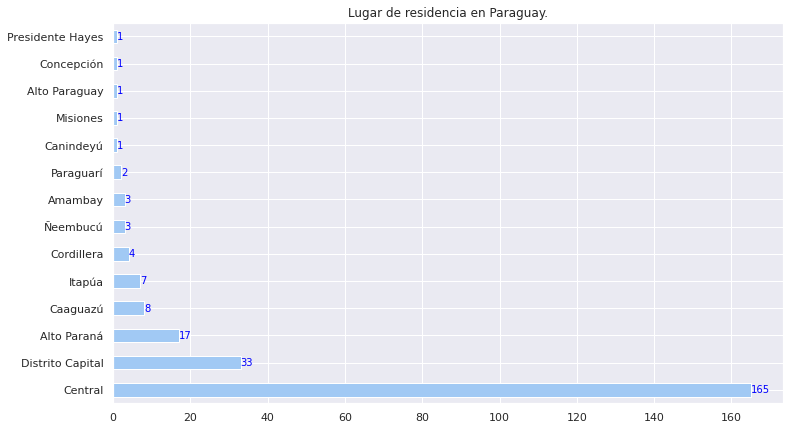

In [9]:
lugar_residencia = df['lugar_residencia_py'].value_counts()

lugar_residencia_plot = lugar_residencia.plot(
    kind='barh',
    title='Lugar de residencia en Paraguay.',
)

for k,v in enumerate(lugar_residencia):
    lugar_residencia_plot.annotate(v,(v,k),  
                                   va='center',
                                   color='blue',
                                   fontsize=10)

plt.show()

In [10]:
df['lugar_residencia_py'].value_counts(normalize=True)

Central             0.668016
Distrito Capital    0.133603
Alto Paraná         0.068826
Caaguazú            0.032389
Itapúa              0.028340
Cordillera          0.016194
Ñeembucú            0.012146
Amambay             0.012146
Paraguarí           0.008097
Canindeyú           0.004049
Misiones            0.004049
Alto Paraguay       0.004049
Concepción          0.004049
Presidente Hayes    0.004049
Name: lugar_residencia_py, dtype: float64

In [11]:
df.loc[df['lugar_residencia']=='Paraguay'].shape

(236, 17)

## estado_calles

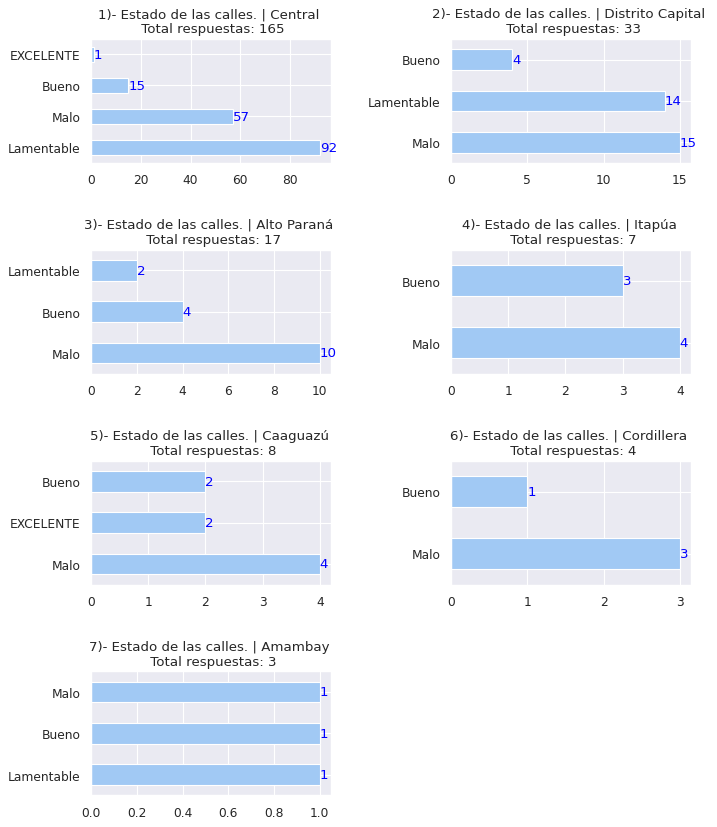

In [12]:
plt.figure(figsize=(15, 40), dpi=80) 
k=0
for k,v in enumerate(lugares_optimos.keys()):
    k+=1
    estado_calles_plot = plt.subplot(8,2,k)
    p = df.loc[df['lugar_residencia_py'] == v]

    estado_calles_plot = p['estado_calles'].value_counts().plot(
        kind='barh',
        title=f'{k})- Estado de las calles. | {v} \n Total respuestas: {p.shape[0]}',
        ylabel='',
        xlabel=''
        )
        
    for k,v in enumerate( p['estado_calles'].value_counts().values):
           estado_calles_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=.6, 
                    wspace=0.5, 
                    hspace=0.7)
        
    
plt.show()

In [13]:
for k,v in enumerate(lugares_optimos.keys()):
    p = df.loc[df['lugar_residencia_py'] == v]
    print('-'*22)
    print(f'DISTRITO: {v}')
    print('-'*22)
    print(f"{p['estado_calles'].value_counts(normalize=True)}")

----------------------
DISTRITO: Central
----------------------
Lamentable    0.557576
Malo          0.345455
Bueno         0.090909
EXCELENTE     0.006061
Name: estado_calles, dtype: float64
----------------------
DISTRITO: Distrito Capital
----------------------
Malo          0.454545
Lamentable    0.424242
Bueno         0.121212
Name: estado_calles, dtype: float64
----------------------
DISTRITO: Alto Paraná
----------------------
Malo          0.625
Bueno         0.250
Lamentable    0.125
Name: estado_calles, dtype: float64
----------------------
DISTRITO: Itapúa
----------------------
Malo     0.571429
Bueno    0.428571
Name: estado_calles, dtype: float64
----------------------
DISTRITO: Caaguazú
----------------------
Malo         0.50
EXCELENTE    0.25
Bueno        0.25
Name: estado_calles, dtype: float64
----------------------
DISTRITO: Cordillera
----------------------
Malo     0.75
Bueno    0.25
Name: estado_calles, dtype: float64
----------------------
DISTRITO: Amambay
----

## problema_baches

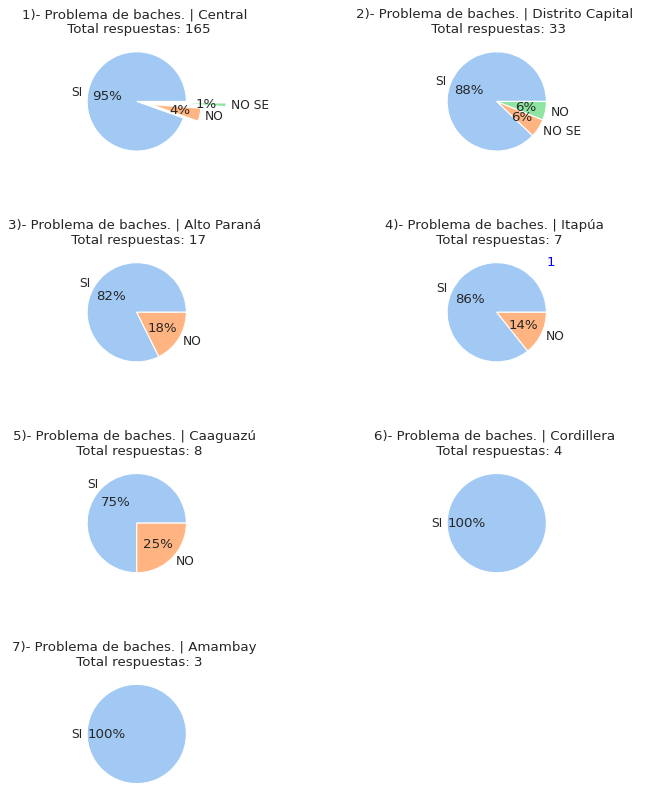

In [14]:

plt.figure(figsize=(15, 40), dpi=80) 
k=0
for k,v in enumerate(lugares_optimos.keys()):
    k+=1
    problema_baches_plot = plt.subplot(8,2,k)
    p = df.loc[df['lugar_residencia_py'] == v]

    if(k==1):
        problema_baches_plot = p['problema_baches'].value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Problema de baches. | {v} \n Total respuestas: {p.shape[0]}',
        autopct='%.0f%%',
        ylabel='',
        explode=[0,.3,.8],
        xlabel=''
        )
    else:
        problema_baches_plot = p['problema_baches'].value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Problema de baches. | {v} \n Total respuestas: {p.shape[0]}',
        autopct='%.0f%%',
        ylabel='',
        xlabel=''
        )
        
        
    
    
        
    for k,v in enumerate( p['problema_baches'].value_counts().values):
           problema_baches_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=.6, 
                    wspace=0.5, 
                    hspace=0.7)
        
    
plt.show()

In [15]:
for k,v in enumerate(lugares_optimos.keys()):
    p = df.loc[df['lugar_residencia_py'] == v]
    print('-'*22)
    print(f'DISTRITO: {v}, TOTAL RESPUESTAS: {p.shape[0]}')
    print('-'*22)
    print(f"{p['problema_baches'].value_counts(normalize=True)}")

----------------------
DISTRITO: Central, TOTAL RESPUESTAS: 165
----------------------
SI       0.945455
NO       0.042424
NO SE    0.012121
Name: problema_baches, dtype: float64
----------------------
DISTRITO: Distrito Capital, TOTAL RESPUESTAS: 33
----------------------
SI       0.878788
NO SE    0.060606
NO       0.060606
Name: problema_baches, dtype: float64
----------------------
DISTRITO: Alto Paraná, TOTAL RESPUESTAS: 17
----------------------
SI    0.823529
NO    0.176471
Name: problema_baches, dtype: float64
----------------------
DISTRITO: Itapúa, TOTAL RESPUESTAS: 7
----------------------
SI    0.857143
NO    0.142857
Name: problema_baches, dtype: float64
----------------------
DISTRITO: Caaguazú, TOTAL RESPUESTAS: 8
----------------------
SI    0.75
NO    0.25
Name: problema_baches, dtype: float64
----------------------
DISTRITO: Cordillera, TOTAL RESPUESTAS: 4
----------------------
SI    1.0
Name: problema_baches, dtype: float64
----------------------
DISTRITO: Amambay, 

## estimacion_cantidad

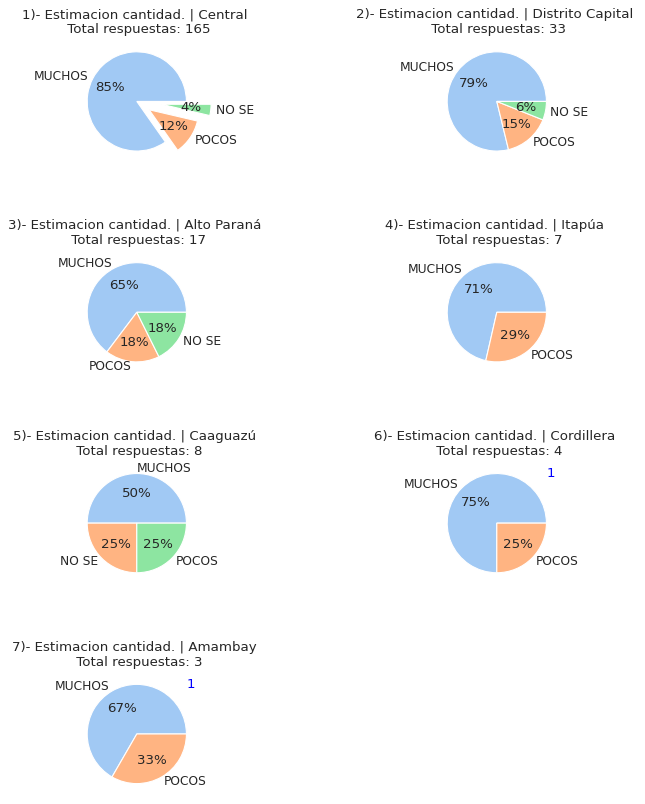

In [16]:

plt.figure(figsize=(15, 40), dpi=80) 
k=0
for k,v in enumerate(lugares_optimos.keys()):
    k+=1
    estimacion_cantidad_plot = plt.subplot(8,2,k)
    p = df.loc[df['lugar_residencia_py'] == v]

    if(k==1):
        estimacion_cantidad_plot = p['estimacion_cantidad'].value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Estimacion cantidad. | {v} \n Total respuestas: {p.shape[0]}',
        autopct='%.0f%%',
        explode=[0,.3,.5],
        ylabel='',
        xlabel=''
        )
    else:
        estimacion_cantidad_plot = p['estimacion_cantidad'].value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Estimacion cantidad. | {v} \n Total respuestas: {p.shape[0]}',
        autopct='%.0f%%',
        ylabel='',
        xlabel=''
        )
        
        
    for k,v in enumerate( p['estimacion_cantidad'].value_counts().values):
           estimacion_cantidad_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=.6, 
                    wspace=0.5, 
                    hspace=0.7)
        
    
plt.show()

In [17]:
for k,v in enumerate(lugares_optimos.keys()):
    p = df.loc[df['lugar_residencia_py'] == v]
    print('-'*22)
    print(f'DISTRITO: {v}')
    print('-'*22)
    print(f"{p['estimacion_cantidad'].value_counts()}")

----------------------
DISTRITO: Central
----------------------
MUCHOS    139
POCOS      19
NO SE       6
Name: estimacion_cantidad, dtype: int64
----------------------
DISTRITO: Distrito Capital
----------------------
MUCHOS    26
POCOS      5
NO SE      2
Name: estimacion_cantidad, dtype: int64
----------------------
DISTRITO: Alto Paraná
----------------------
MUCHOS    11
POCOS      3
NO SE      3
Name: estimacion_cantidad, dtype: int64
----------------------
DISTRITO: Itapúa
----------------------
MUCHOS    5
POCOS     2
Name: estimacion_cantidad, dtype: int64
----------------------
DISTRITO: Caaguazú
----------------------
MUCHOS    4
NO SE     2
POCOS     2
Name: estimacion_cantidad, dtype: int64
----------------------
DISTRITO: Cordillera
----------------------
MUCHOS    3
POCOS     1
Name: estimacion_cantidad, dtype: int64
----------------------
DISTRITO: Amambay
----------------------
MUCHOS    2
POCOS     1
Name: estimacion_cantidad, dtype: int64


## tipo_camino

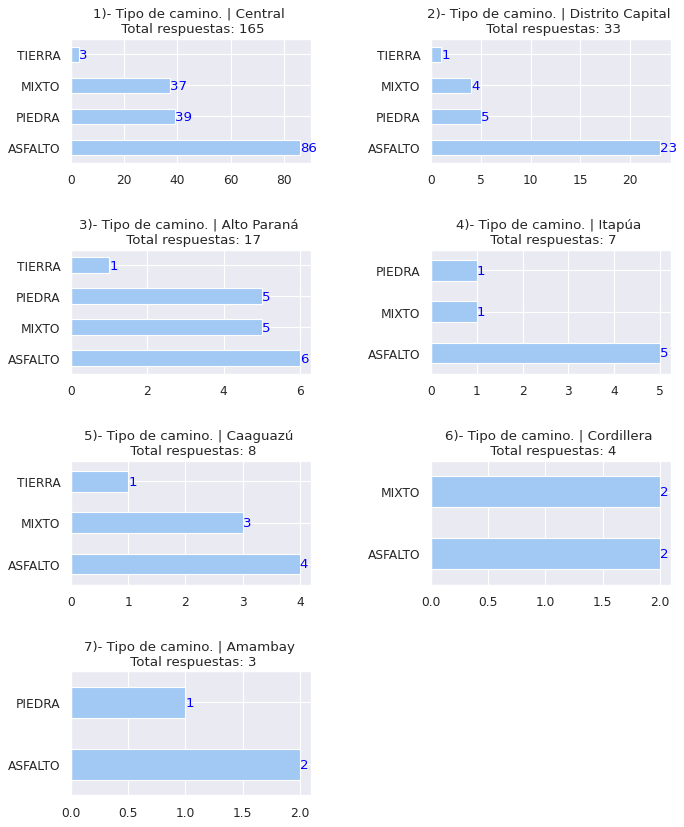

In [18]:
plt.figure(figsize=(15, 40), dpi=80) 
k=0
for k,v in enumerate(lugares_optimos.keys()):
    k+=1
    tipo_camino_plot = plt.subplot(8,2,k)
    p = df.loc[df['lugar_residencia_py'] == v]

    tipo_camino_plot = p['tipo_camino'].value_counts().plot(
        kind='barh',
        title=f'{k})- Tipo de camino. | {v} \n Total respuestas: {p.shape[0]}',
        ylabel='',
        xlabel=''
        )
        
    for k,v in enumerate( p['tipo_camino'].value_counts().values):
           tipo_camino_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=.6, 
                    wspace=0.5, 
                    hspace=0.7)
        
    
plt.show()

In [19]:
for k,v in enumerate(lugares_optimos.keys()):
    p = df.loc[df['lugar_residencia_py'] == v]
    print('-'*22)
    print(f'DISTRITO: {v} | {p.shape[0]}')
    print('-'*22)
    print(f"{p['tipo_camino'].value_counts(normalize=True)}")

----------------------
DISTRITO: Central | 165
----------------------
ASFALTO    0.521212
PIEDRA     0.236364
MIXTO      0.224242
TIERRA     0.018182
Name: tipo_camino, dtype: float64
----------------------
DISTRITO: Distrito Capital | 33
----------------------
ASFALTO    0.696970
PIEDRA     0.151515
MIXTO      0.121212
TIERRA     0.030303
Name: tipo_camino, dtype: float64
----------------------
DISTRITO: Alto Paraná | 17
----------------------
ASFALTO    0.352941
MIXTO      0.294118
PIEDRA     0.294118
TIERRA     0.058824
Name: tipo_camino, dtype: float64
----------------------
DISTRITO: Itapúa | 7
----------------------
ASFALTO    0.714286
MIXTO      0.142857
PIEDRA     0.142857
Name: tipo_camino, dtype: float64
----------------------
DISTRITO: Caaguazú | 8
----------------------
ASFALTO    0.500
MIXTO      0.375
TIERRA     0.125
Name: tipo_camino, dtype: float64
----------------------
DISTRITO: Cordillera | 4
----------------------
ASFALTO    0.5
MIXTO      0.5
Name: tipo_camino, dt

## tiempo_reparaciones

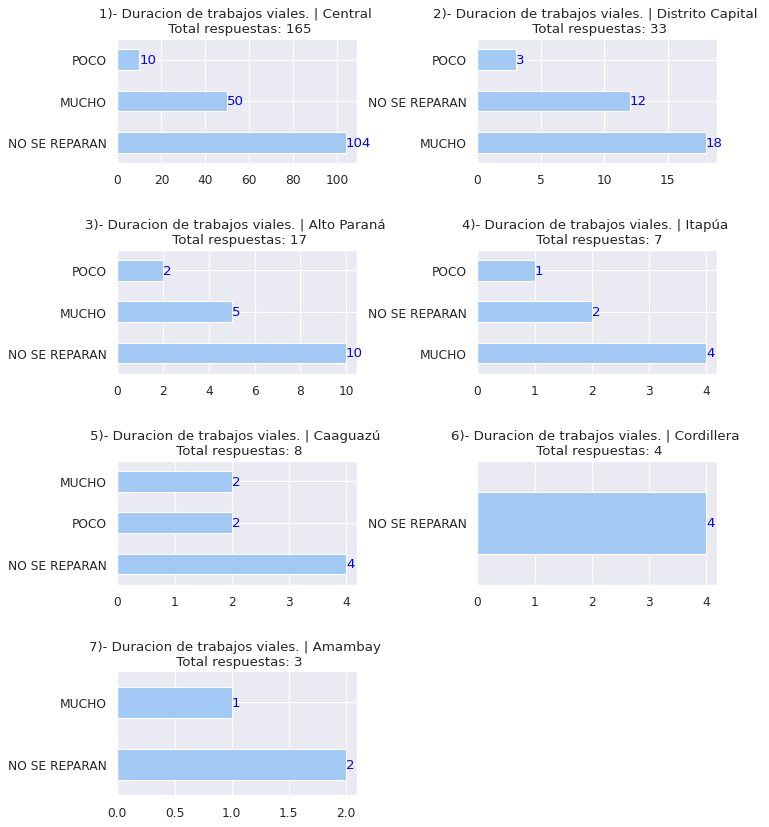

In [20]:
plt.figure(figsize=(15, 40), dpi=80) 
k=0
for k,v in enumerate(lugares_optimos.keys()):
    k+=1
    tiempo_reparaciones_plot = plt.subplot(8,2,k)
    p = df.loc[df['lugar_residencia_py'] == v]

    tiempo_reparaciones_plot = p['tiempo_reparaciones'].value_counts().plot(
        kind='barh',
        title=f'{k})- Duracion de trabajos viales. | {v} \n Total respuestas: {p.shape[0]}',
        ylabel='',
        xlabel=''
        )
        
    for k,v in enumerate( p['tiempo_reparaciones'].value_counts().values):
           tiempo_reparaciones_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=.6, 
                    wspace=0.5, 
                    hspace=0.7)
        
    
plt.show()

In [21]:
for k,v in enumerate(lugares_optimos.keys()):
    p = df.loc[df['lugar_residencia_py'] == v]
    print('-'*22)
    print(f'DISTRITO: {v}. Respuestas: {p.shape[0]}')
    print('-'*22)
    print(f"{p['tiempo_reparaciones'].value_counts(normalize=True)}")

----------------------
DISTRITO: Central. Respuestas: 165
----------------------
NO SE REPARAN    0.634146
MUCHO            0.304878
POCO             0.060976
Name: tiempo_reparaciones, dtype: float64
----------------------
DISTRITO: Distrito Capital. Respuestas: 33
----------------------
MUCHO            0.545455
NO SE REPARAN    0.363636
POCO             0.090909
Name: tiempo_reparaciones, dtype: float64
----------------------
DISTRITO: Alto Paraná. Respuestas: 17
----------------------
NO SE REPARAN    0.588235
MUCHO            0.294118
POCO             0.117647
Name: tiempo_reparaciones, dtype: float64
----------------------
DISTRITO: Itapúa. Respuestas: 7
----------------------
MUCHO            0.571429
NO SE REPARAN    0.285714
POCO             0.142857
Name: tiempo_reparaciones, dtype: float64
----------------------
DISTRITO: Caaguazú. Respuestas: 8
----------------------
NO SE REPARAN    0.50
POCO             0.25
MUCHO            0.25
Name: tiempo_reparaciones, dtype: float64


## como_denunciar

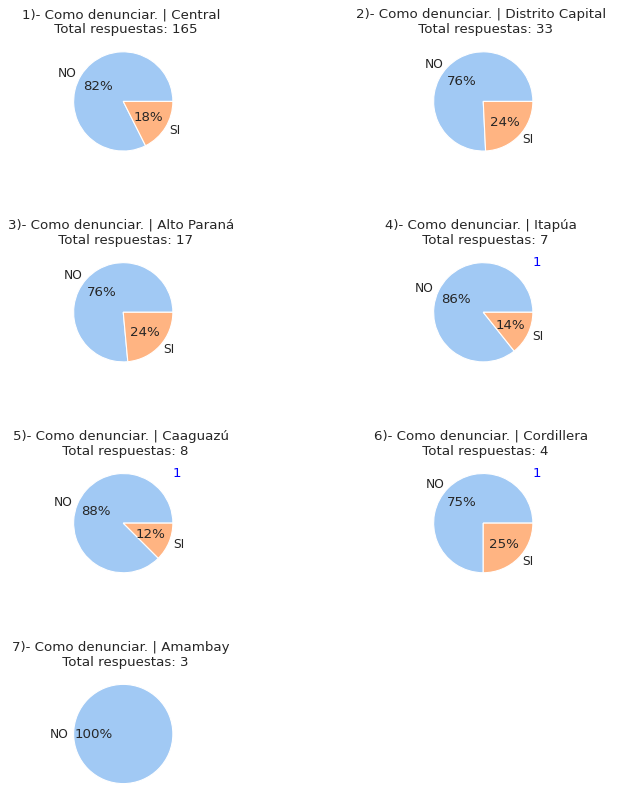

In [22]:
plt.figure(figsize=(15, 40), dpi=80) 
k=0
for k,v in enumerate(lugares_optimos.keys()):
    k+=1
    como_denunciar_plot = plt.subplot(8,2,k)
    p = df.loc[df['lugar_residencia_py'] == v]

    como_denunciar_plot = p['como_denunciar'].value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Como denunciar. | {v} \n Total respuestas: {p.shape[0]}',
        autopct='%.0f%%',
        ylabel='',
        xlabel=''
        )
        
    for k,v in enumerate( p['como_denunciar'].value_counts().values):
           como_denunciar_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=.6, 
                    wspace=0.5, 
                    hspace=0.7)
        
    
plt.show()

In [23]:
for k,v in enumerate(lugares_optimos.keys()):
    p = df.loc[df['lugar_residencia_py'] == v]
    print('-'*22)
    print(f'DISTRITO: {v}')
    print('-'*22)
    print(f"{p['como_denunciar'].value_counts()}")

----------------------
DISTRITO: Central
----------------------
NO    136
SI     29
Name: como_denunciar, dtype: int64
----------------------
DISTRITO: Distrito Capital
----------------------
NO    25
SI     8
Name: como_denunciar, dtype: int64
----------------------
DISTRITO: Alto Paraná
----------------------
NO    13
SI     4
Name: como_denunciar, dtype: int64
----------------------
DISTRITO: Itapúa
----------------------
NO    6
SI    1
Name: como_denunciar, dtype: int64
----------------------
DISTRITO: Caaguazú
----------------------
NO    7
SI    1
Name: como_denunciar, dtype: int64
----------------------
DISTRITO: Cordillera
----------------------
NO    3
SI    1
Name: como_denunciar, dtype: int64
----------------------
DISTRITO: Amambay
----------------------
NO    3
Name: como_denunciar, dtype: int64


## acceso_informacion

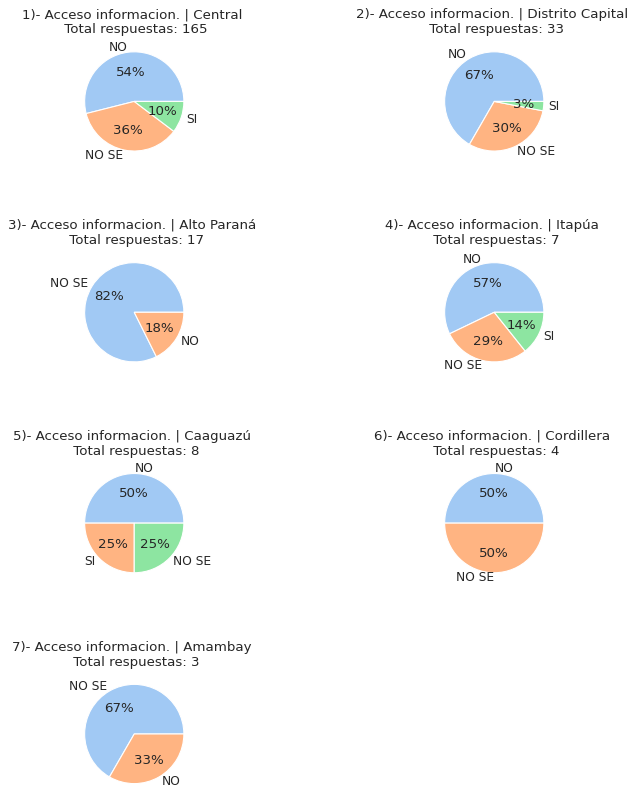

In [24]:
plt.figure(figsize=(15, 40), dpi=80) 
k=0
for k,v in enumerate(lugares_optimos.keys()):
    k+=1
    acceso_informacion_plot = plt.subplot(8,2,k)
    p = df.loc[df['lugar_residencia_py'] == v]

    acceso_informacion_plot = p['acceso_informacion'].value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Acceso informacion. | {v} \n Total respuestas: {p.shape[0]}',
        autopct='%.0f%%',
        ylabel='',
        xlabel=''
        )
        
    for k,v in enumerate( p['acceso_informacion'].value_counts().values):
           como_denunciar_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=.6, 
                    wspace=0.5, 
                    hspace=0.7)
        
    
plt.show()

In [25]:
for k,v in enumerate(lugares_optimos.keys()):
    p = df.loc[df['lugar_residencia_py'] == v]
    print('-'*22)
    print(f'DISTRITO: {v}')
    print('-'*22)
    print(f"{p['acceso_informacion'].value_counts()}")

----------------------
DISTRITO: Central
----------------------
NO       89
NO SE    59
SI       17
Name: acceso_informacion, dtype: int64
----------------------
DISTRITO: Distrito Capital
----------------------
NO       22
NO SE    10
SI        1
Name: acceso_informacion, dtype: int64
----------------------
DISTRITO: Alto Paraná
----------------------
NO SE    14
NO        3
Name: acceso_informacion, dtype: int64
----------------------
DISTRITO: Itapúa
----------------------
NO       4
NO SE    2
SI       1
Name: acceso_informacion, dtype: int64
----------------------
DISTRITO: Caaguazú
----------------------
NO       4
SI       2
NO SE    2
Name: acceso_informacion, dtype: int64
----------------------
DISTRITO: Cordillera
----------------------
NO       2
NO SE    2
Name: acceso_informacion, dtype: int64
----------------------
DISTRITO: Amambay
----------------------
NO SE    2
NO       1
Name: acceso_informacion, dtype: int64


## sufrio_accidentes

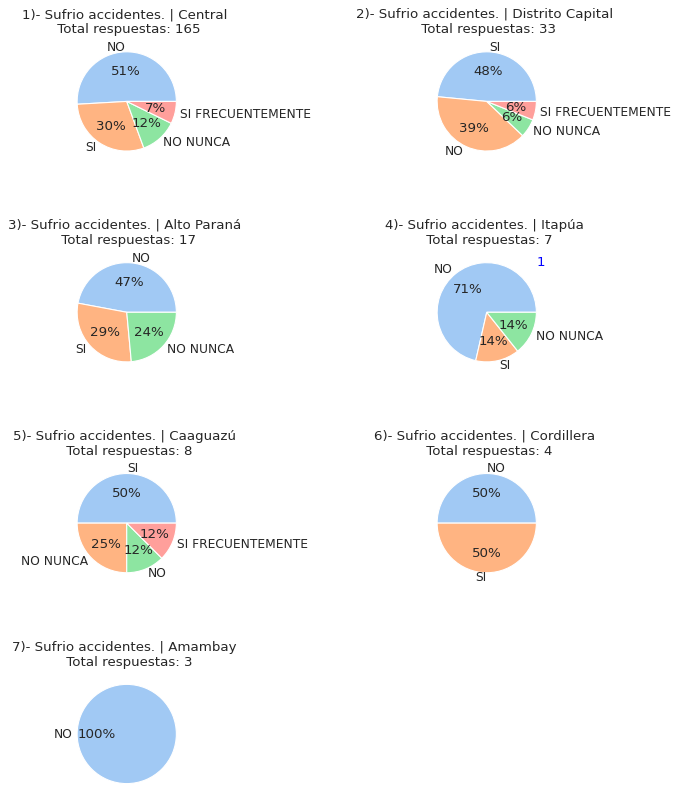

In [26]:
plt.figure(figsize=(15, 40), dpi=80) 
k=0
for k,v in enumerate(lugares_optimos.keys()):
    k+=1
    sufrio_accidentes_plot = plt.subplot(8,2,k)
    p = df.loc[df['lugar_residencia_py'] == v]

    sufrio_accidentes_plot = p['sufrio_accidentes'].value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Sufrio accidentes. | {v} \n Total respuestas: {p.shape[0]}',
        autopct='%.0f%%',
        ylabel='',
        xlabel=''
        )
        
    for k,v in enumerate( p['sufrio_accidentes'].value_counts().values):
           sufrio_accidentes_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=.6, 
                    wspace=0.5, 
                    hspace=0.7)
        
    
plt.show()

In [27]:
for k,v in enumerate(lugares_optimos.keys()):
    p = df.loc[df['lugar_residencia_py'] == v]
    print('-'*22)
    print(f'Sufrio accidentes.? DISTRITO: {v} RESPUESTAS: {p.shape[0]}')
    print('-'*22)
    print(f"{p['sufrio_accidentes'].value_counts(normalize=True)}")

----------------------
Sufrio accidentes.? DISTRITO: Central RESPUESTAS: 165
----------------------
NO                   0.509091
SI                   0.296970
NO NUNCA             0.121212
SI FRECUENTEMENTE    0.072727
Name: sufrio_accidentes, dtype: float64
----------------------
Sufrio accidentes.? DISTRITO: Distrito Capital RESPUESTAS: 33
----------------------
SI                   0.484848
NO                   0.393939
NO NUNCA             0.060606
SI FRECUENTEMENTE    0.060606
Name: sufrio_accidentes, dtype: float64
----------------------
Sufrio accidentes.? DISTRITO: Alto Paraná RESPUESTAS: 17
----------------------
NO          0.470588
SI          0.294118
NO NUNCA    0.235294
Name: sufrio_accidentes, dtype: float64
----------------------
Sufrio accidentes.? DISTRITO: Itapúa RESPUESTAS: 7
----------------------
NO          0.714286
SI          0.142857
NO NUNCA    0.142857
Name: sufrio_accidentes, dtype: float64
----------------------
Sufrio accidentes.? DISTRITO: Caaguazú RESP

## frecuencia_mantenimiento

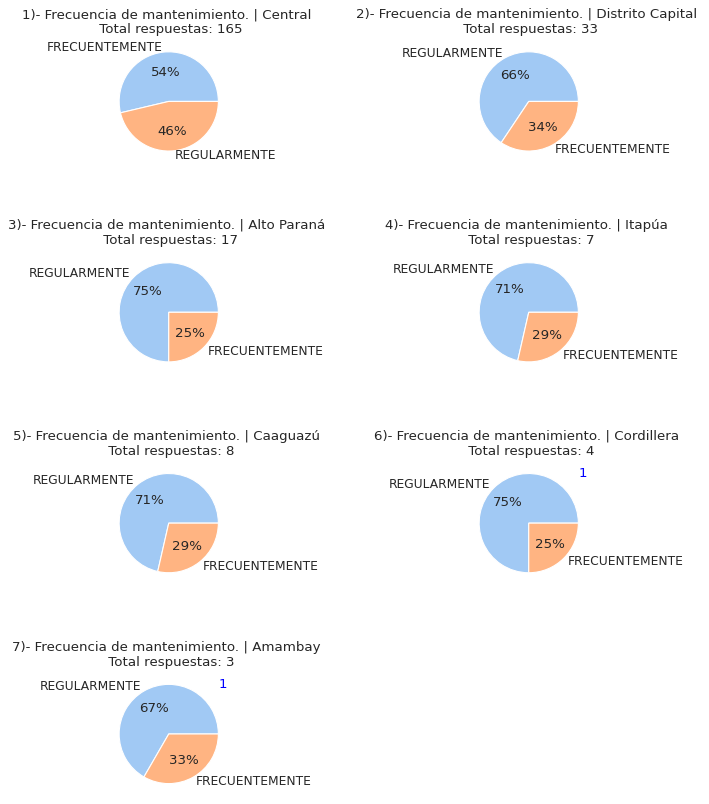

In [28]:
plt.figure(figsize=(15, 40), dpi=80) 
k=0
for k,v in enumerate(lugares_optimos.keys()):
    k+=1
    frec_mantenimiento_plot = plt.subplot(8,2,k)
    p = df.loc[df['lugar_residencia_py'] == v]

    frec_mantenimiento_plot = p['frecuencia_mantenimiento'].value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Frecuencia de mantenimiento. | {v} \n Total respuestas: {p.shape[0]}',
        autopct='%.0f%%',
        ylabel='',
        xlabel=''
        )
        
    for k,v in enumerate( p['frecuencia_mantenimiento'].value_counts().values):
           frec_mantenimiento_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=.6, 
                    wspace=0.5, 
                    hspace=0.7)
        
    
plt.show()

In [29]:
for k,v in enumerate(lugares_optimos.keys()):
    p = df.loc[df['lugar_residencia_py'] == v]
    print('-'*22)
    print(f'Frecuencia mantenimiento. DISTRITO: {v}')
    print('-'*22)
    print(f"{p['frecuencia_mantenimiento'].value_counts()}")

----------------------
Frecuencia mantenimiento. DISTRITO: Central
----------------------
FRECUENTEMENTE    80
REGULARMENTE      69
Name: frecuencia_mantenimiento, dtype: int64
----------------------
Frecuencia mantenimiento. DISTRITO: Distrito Capital
----------------------
REGULARMENTE      21
FRECUENTEMENTE    11
Name: frecuencia_mantenimiento, dtype: int64
----------------------
Frecuencia mantenimiento. DISTRITO: Alto Paraná
----------------------
REGULARMENTE      12
FRECUENTEMENTE     4
Name: frecuencia_mantenimiento, dtype: int64
----------------------
Frecuencia mantenimiento. DISTRITO: Itapúa
----------------------
REGULARMENTE      5
FRECUENTEMENTE    2
Name: frecuencia_mantenimiento, dtype: int64
----------------------
Frecuencia mantenimiento. DISTRITO: Caaguazú
----------------------
REGULARMENTE      5
FRECUENTEMENTE    2
Name: frecuencia_mantenimiento, dtype: int64
----------------------
Frecuencia mantenimiento. DISTRITO: Cordillera
----------------------
REGULARMENTE 

## denunciaria_baches

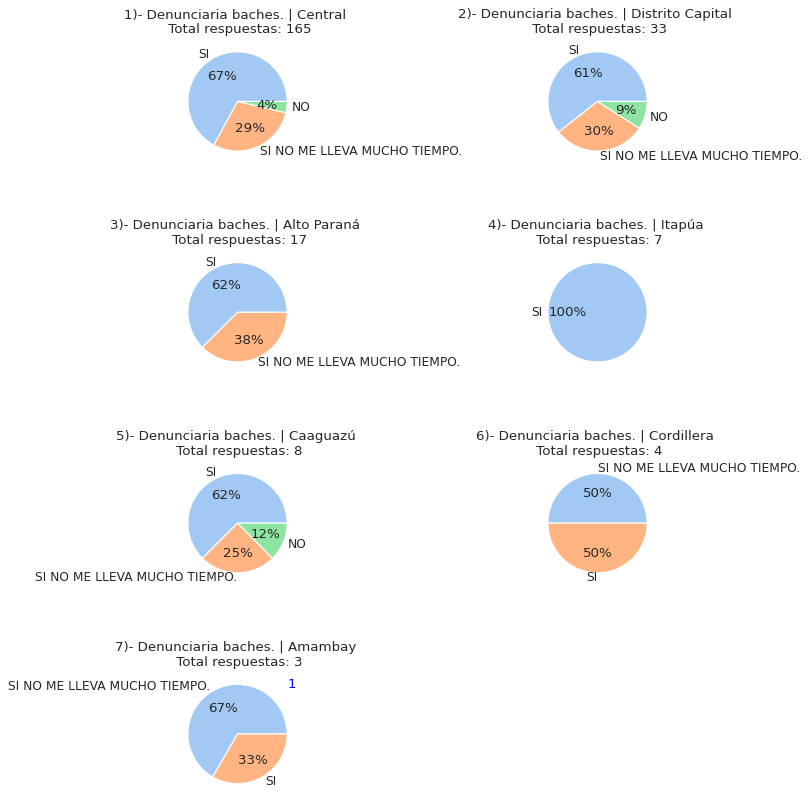

In [30]:
plt.figure(figsize=(15, 40), dpi=80) 
k=0
for k,v in enumerate(lugares_optimos.keys()):
    k+=1
    denunciaria_baches_plot = plt.subplot(8,2,k)
    p = df.loc[df['lugar_residencia_py'] == v]

    denunciaria_baches_plot = p['denunciaria_baches'].value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Denunciaria baches. | {v} \n Total respuestas: {p.shape[0]}',
        autopct='%.0f%%',
        ylabel='',
        xlabel=''
        )
        
    for k,v in enumerate( p['denunciaria_baches'].value_counts().values):
           denunciaria_baches_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=.6, 
                    wspace=0.5, 
                    hspace=0.7)
        
    
plt.show()

In [31]:
for k,v in enumerate(lugares_optimos.keys()):
    p = df.loc[df['lugar_residencia_py'] == v]
    print('-'*22)
    print(f'Denunciaria baches.? DISTRITO: {v}')
    print('-'*22)
    print(f"{p['denunciaria_baches'].value_counts()}")

----------------------
Denunciaria baches.? DISTRITO: Central
----------------------
SI                              110
SI NO ME LLEVA MUCHO TIEMPO.     48
NO                                6
Name: denunciaria_baches, dtype: int64
----------------------
Denunciaria baches.? DISTRITO: Distrito Capital
----------------------
SI                              20
SI NO ME LLEVA MUCHO TIEMPO.    10
NO                               3
Name: denunciaria_baches, dtype: int64
----------------------
Denunciaria baches.? DISTRITO: Alto Paraná
----------------------
SI                              10
SI NO ME LLEVA MUCHO TIEMPO.     6
Name: denunciaria_baches, dtype: int64
----------------------
Denunciaria baches.? DISTRITO: Itapúa
----------------------
SI    7
Name: denunciaria_baches, dtype: int64
----------------------
Denunciaria baches.? DISTRITO: Caaguazú
----------------------
SI                              5
SI NO ME LLEVA MUCHO TIEMPO.    2
NO                              1
Name: denunci

## util_conocer

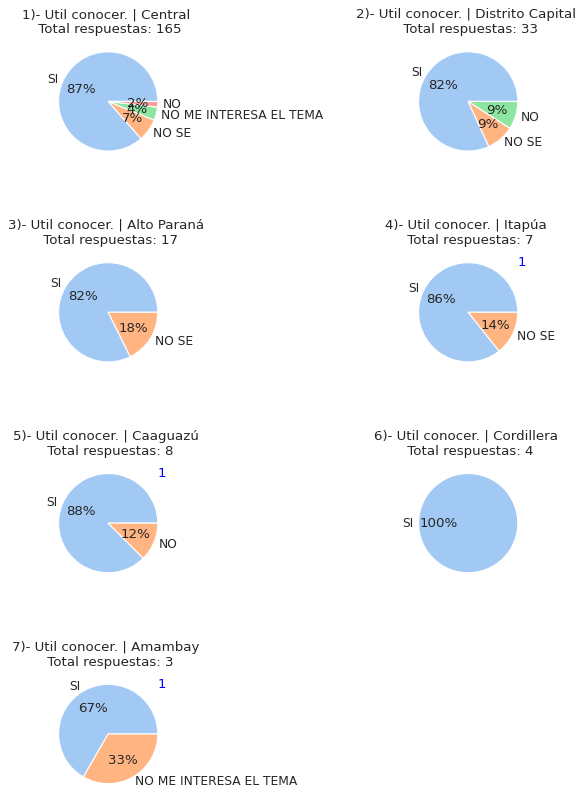

In [32]:
plt.figure(figsize=(15, 40), dpi=80) 
k=0
for k,v in enumerate(lugares_optimos.keys()):
    k+=1
    util_conocer_plot = plt.subplot(8,2,k)
    p = df.loc[df['lugar_residencia_py'] == v]

    util_conocer_plot = p['util_conocer'].value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Util conocer. | {v} \n Total respuestas: {p.shape[0]}',
        autopct='%.0f%%',
        ylabel='',
        xlabel=''
        )
        
    for k,v in enumerate( p['util_conocer'].value_counts().values):
           util_conocer_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=.6, 
                    wspace=0.5, 
                    hspace=0.7)
        
    
plt.show()

In [39]:
for k,v in enumerate(lugares_optimos.keys()):
    p = df.loc[df['lugar_residencia_py'] == v]
    print('-'*22)
    print(f'Util conocer datos.? DISTRITO: {v}. RESPUESTAS: {p.shape[0]}')
    print('-'*22)
    print(f"{p['util_conocer'].value_counts(normalize=True)}")

----------------------
Util conocer datos.? DISTRITO: Central. RESPUESTAS: 165
----------------------
SI                        0.865031
NO SE                     0.073620
NO ME INTERESA EL TEMA    0.042945
NO                        0.018405
Name: util_conocer, dtype: float64
----------------------
Util conocer datos.? DISTRITO: Distrito Capital. RESPUESTAS: 33
----------------------
SI       0.818182
NO SE    0.090909
NO       0.090909
Name: util_conocer, dtype: float64
----------------------
Util conocer datos.? DISTRITO: Alto Paraná. RESPUESTAS: 17
----------------------
SI       0.823529
NO SE    0.176471
Name: util_conocer, dtype: float64
----------------------
Util conocer datos.? DISTRITO: Itapúa. RESPUESTAS: 7
----------------------
SI       0.857143
NO SE    0.142857
Name: util_conocer, dtype: float64
----------------------
Util conocer datos.? DISTRITO: Caaguazú. RESPUESTAS: 8
----------------------
SI    0.875
NO    0.125
Name: util_conocer, dtype: float64
------------------

## respuesta_gubernamental

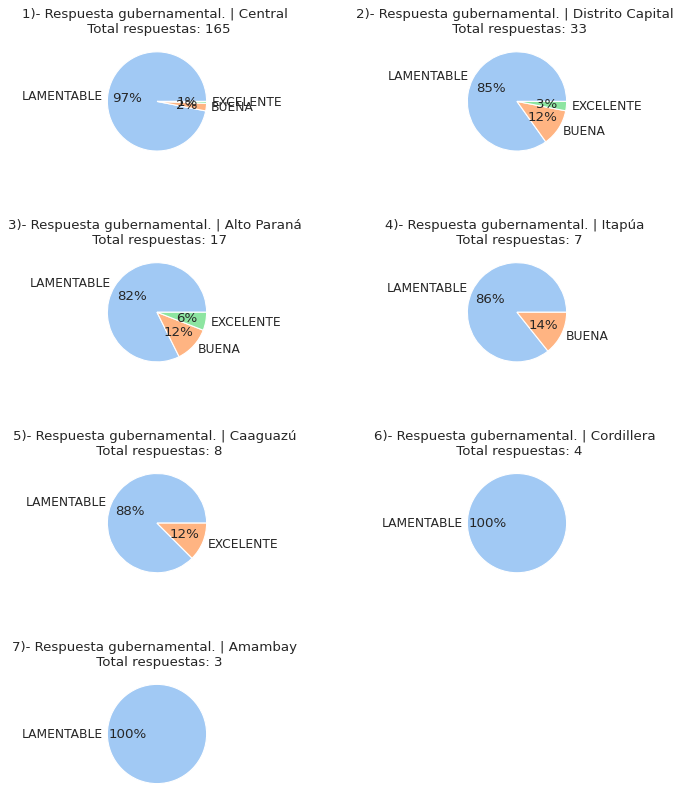

In [34]:
plt.figure(figsize=(15, 40), dpi=80) 
k=0
for k,v in enumerate(lugares_optimos.keys()):
    k+=1
    respuesta_gubernamental_plot = plt.subplot(8,2,k)
    p = df.loc[df['lugar_residencia_py'] == v]

    respuesta_gubernamental_plot = p['respuesta_gubernamental'].value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Respuesta gubernamental. | {v} \n Total respuestas: {p.shape[0]}',
        autopct='%.0f%%',
        ylabel='',
        xlabel=''
        )
        
    for k,v in enumerate( p['respuesta_gubernamental'].value_counts().values):
           como_denunciar_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=.6, 
                    wspace=0.5, 
                    hspace=0.7)
        
    
plt.show()

In [38]:
for k,v in enumerate(lugares_optimos.keys()):
    p = df.loc[df['lugar_residencia_py'] == v]
    print('-'*22)
    print(f'Respuesta gubernamental. DISTRITO: {v}. RESPUESTAS: {p.shape[0]}')
    print('-'*22)
    print(f"{p['respuesta_gubernamental'].value_counts(normalize=True)}")

----------------------
Respuesta gubernamental. DISTRITO: Central. RESPUESTAS: 165
----------------------
LAMENTABLE    0.969325
BUENA         0.024540
EXCELENTE     0.006135
Name: respuesta_gubernamental, dtype: float64
----------------------
Respuesta gubernamental. DISTRITO: Distrito Capital. RESPUESTAS: 33
----------------------
LAMENTABLE    0.848485
BUENA         0.121212
EXCELENTE     0.030303
Name: respuesta_gubernamental, dtype: float64
----------------------
Respuesta gubernamental. DISTRITO: Alto Paraná. RESPUESTAS: 17
----------------------
LAMENTABLE    0.823529
BUENA         0.117647
EXCELENTE     0.058824
Name: respuesta_gubernamental, dtype: float64
----------------------
Respuesta gubernamental. DISTRITO: Itapúa. RESPUESTAS: 7
----------------------
LAMENTABLE    0.857143
BUENA         0.142857
Name: respuesta_gubernamental, dtype: float64
----------------------
Respuesta gubernamental. DISTRITO: Caaguazú. RESPUESTAS: 8
----------------------
LAMENTABLE    0.875
EXCELE

## regularidad_reparaciones

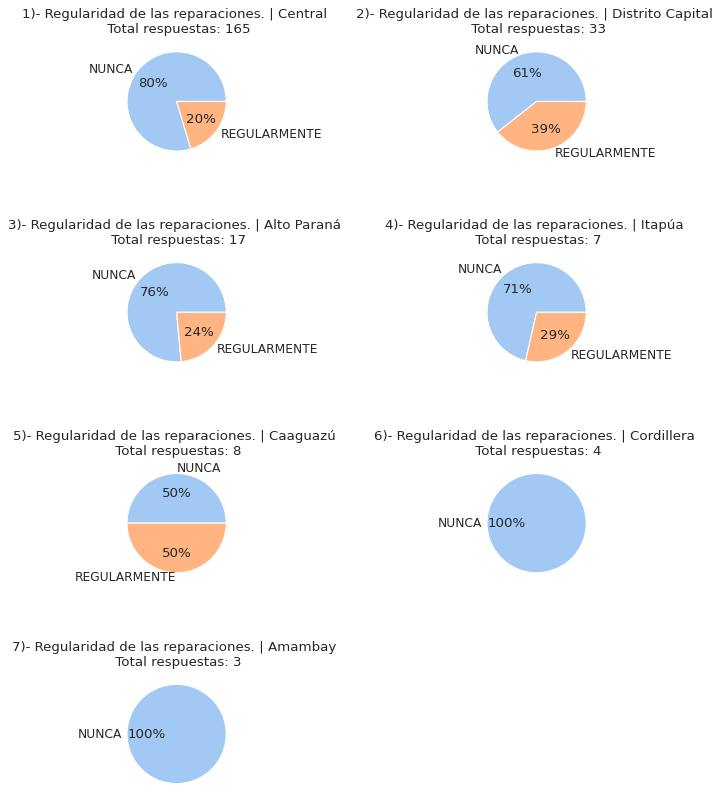

In [36]:
plt.figure(figsize=(15, 40), dpi=80) 
k=0
for k,v in enumerate(lugares_optimos.keys()):
    k+=1
    acceso_informacion_plot = plt.subplot(8,2,k)
    p = df.loc[df['lugar_residencia_py'] == v]

    regularidad_reparaciones_plot = p['regularidad_reparaciones'].value_counts(normalize=True).plot(
        kind='pie',
        title=f'{k})- Regularidad de las reparaciones. | {v} \n Total respuestas: {p.shape[0]}',
        autopct='%.0f%%',
        ylabel='',
        xlabel=''
        )
        
    for k,v in enumerate( p['regularidad_reparaciones'].value_counts().values):
           regularidad_reparaciones_plot.annotate(v,(v,k),  va='center',color='blue')

        
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=.6, 
                    wspace=0.5, 
                    hspace=0.7)
        
    
plt.show()

In [37]:
for k,v in enumerate(lugares_optimos.keys()):
    p = df.loc[df['lugar_residencia_py'] == v]
    print('-'*22)
    print(f'Sufrio accidentes.? DISTRITO: {v}')
    print('-'*22)
    print(f"{p['regularidad_reparaciones'].value_counts()}")

----------------------
Sufrio accidentes.? DISTRITO: Central
----------------------
NUNCA           129
REGULARMENTE     33
Name: regularidad_reparaciones, dtype: int64
----------------------
Sufrio accidentes.? DISTRITO: Distrito Capital
----------------------
NUNCA           20
REGULARMENTE    13
Name: regularidad_reparaciones, dtype: int64
----------------------
Sufrio accidentes.? DISTRITO: Alto Paraná
----------------------
NUNCA           13
REGULARMENTE     4
Name: regularidad_reparaciones, dtype: int64
----------------------
Sufrio accidentes.? DISTRITO: Itapúa
----------------------
NUNCA           5
REGULARMENTE    2
Name: regularidad_reparaciones, dtype: int64
----------------------
Sufrio accidentes.? DISTRITO: Caaguazú
----------------------
NUNCA           4
REGULARMENTE    4
Name: regularidad_reparaciones, dtype: int64
----------------------
Sufrio accidentes.? DISTRITO: Cordillera
----------------------
NUNCA    4
Name: regularidad_reparaciones, dtype: int64
-----------